In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt = 600 #s
EP_baro = np.load('Ep_2_barotropic.npz')
EP_febTS = np.load('Ep_febTS.npz')

KE_baro = np.load('Ke_2_barotropic.npz')
KE_febTS = np.load('Ke_febTS.npz')

Ewind_SVB =        np.array([1967.336140,
                             13658.249842,
                             58381.587749,
                             203059.249746,
                             583040.490311,
                            1605971.282449,
                            4212949.908733,
                            9988163.429514,
                            22737647.608706,
                            49719098.402076,
                            100951667.449054,
                            195337257.246875,
                            361892444.111385,
                            631783365.147192,
                            1047506643.644784,
                            1656420482.996358,
                            2488822890.624424,
                            3552559954.569267,
                            4826334444.561691,
                            6249001678.690140,
                            7481331481.931970,
                            0.000000])

Ewind_noSVB =          np.array([1908.242113,
                                13250.440428,
                                56643.048604,
                                197022.699529,
                                565736.516323,
                                1558333.593194,
                                4088052.794804,
                                9692372.395526,
                                22064613.394391,
                                48247946.294462,
                                97966799.420028,
                                189564709.144951,
                                351202565.610907,
                                613133365.634483,
                                1016604312.240177,
                                1607583381.294032,
                                2415491252.341014,
                                3447959452.724622,
                                4684328563.799050,
                                6065263172.112794,
                                7261647121.061090,
                                0.000000])

Ewind_onlySVB =       np.array([57.999554,
                                399.526290,
                                1701.314444,
                                5902.245192,
                                16903.844723,
                                46522.982646,
                                121952.956161,
                                288711.758155,
                                656842.711860,
                                1435618.962636,
                                2912042.260602,
                                5630858.473472,
                                10426294.092496,
                                18186848.292017,
                                30130501.571881,
                                47611648.716257,
                                71482254.507949,
                                101949005.517322,
                                138389008.463340,
                                179037874.016783,
                                213991926.116055,
                                0.000000
                                ])

### Wind

In [4]:
# integrte the wind power input over the whole time it is applied (total energy input into the system)
tot_wind_energy_SVB = np.sum(Ewind_SVB*dt)
tot_wind_energy_noSVB = np.sum(Ewind_noSVB*dt)
tot_wind_energy_onlySVB = np.sum(Ewind_onlySVB*dt)

print('Total wind energy input [J] into SVB is %1.3e' %tot_wind_energy_SVB)
print('Total wind energy input [J] into noSVB is %1.3e' %tot_wind_energy_noSVB)
print('Total wind energy input [J] into the bay alone is %1.3e' %tot_wind_energy_onlySVB)

Total wind energy input [J] into SVB is 1.721e+13
Total wind energy input [J] into noSVB is 1.670e+13
Total wind energy input [J] into the bay alone is 4.934e+11


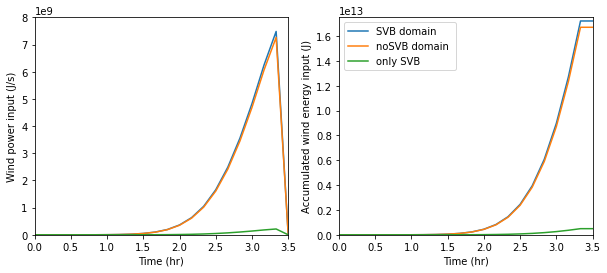

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,Ewind_SVB, label='SVB domain')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,Ewind_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,Ewind_onlySVB, label='only SVB ')
ax1.set_ylabel('Wind power input (J/s)')
ax1.set_xlabel('Time (hr)')
ax1.set_xlim(0,3.5)
ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), label='SVB domain ')
ax2.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), label='noSVB domain ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), label='only SVB')
ax2.set_ylabel('Accumulated wind energy input (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_ylim(0,1.75E13)
ax2.legend()

### Potential energy (ssh)

In [6]:
EP_SVB_baro = EP_baro['EpSVB'][:]
EP_noSVB_baro = EP_baro['EpnoSVB'][:]
EP_onlySVB_baro = EP_baro['Ep'][:]

EP_SVB = EP_febTS['EpSVB'][:]
EP_noSVB = EP_febTS['EpnoSVB'][:]
EP_onlySVB = EP_febTS['Ep'][:]

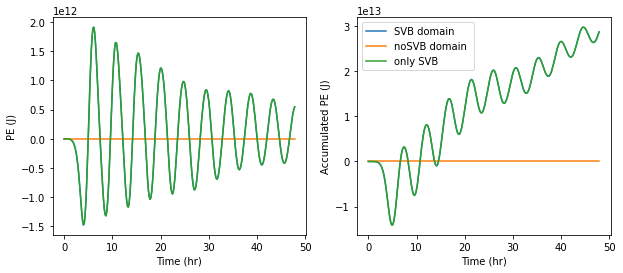

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB, label='SVB domain')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,EP_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='only SVB ')
ax1.set_ylabel('PE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(EP_SVB))*600)/3600,np.cumsum(EP_SVB), label='SVB domain ')
ax2.plot((np.arange(len(EP_noSVB))*600)/3600,np.cumsum(EP_noSVB), label='noSVB domain ')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,np.cumsum(EP_onlySVB), label='only SVB')
ax2.set_ylabel('Accumulated PE (J)')
ax2.set_xlabel('Time (hr)')
#ax2.set_ylim(0,1.75E13)
ax2.legend()

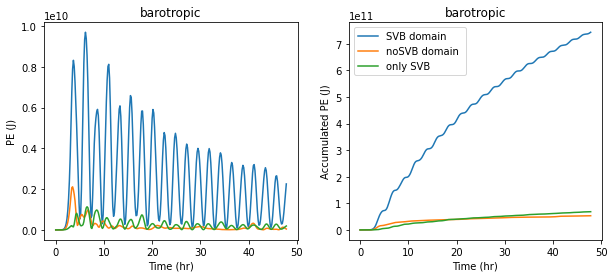

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(EP_SVB_baro))*600)/3600,EP_SVB_baro, label='SVB domain')
ax1.plot((np.arange(len(EP_noSVB_baro))*600)/3600,EP_noSVB_baro, label='noSVB domain')
ax1.plot((np.arange(len(EP_onlySVB_baro))*600)/3600,EP_onlySVB_baro, label='only SVB ')
ax1.set_ylabel('PE (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_title('barotropic')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(EP_SVB_baro))*600)/3600,np.cumsum(EP_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(EP_noSVB_baro))*600)/3600,np.cumsum(EP_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(EP_onlySVB_baro))*600)/3600,np.cumsum(EP_onlySVB_baro), label='only SVB')
ax2.set_ylabel('Accumulated PE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('barotropic')
#ax2.set_ylim(0,1.75E13)
ax2.legend()

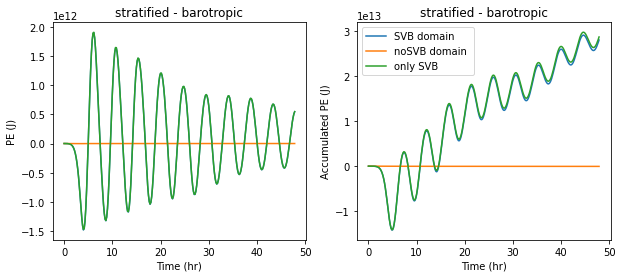

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(EP_SVB_baro))*600)/3600,EP_SVB-EP_SVB_baro, label='SVB domain')
ax1.plot((np.arange(len(EP_noSVB_baro))*600)/3600,EP_noSVB-EP_noSVB_baro, label='noSVB domain')
ax1.plot((np.arange(len(EP_onlySVB_baro))*600)/3600,EP_onlySVB-EP_onlySVB_baro, label='only SVB ')
ax1.set_ylabel('PE (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_title('stratified - barotropic')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(EP_SVB_baro))*600)/3600,np.cumsum(EP_SVB-EP_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(EP_noSVB_baro))*600)/3600,np.cumsum(EP_noSVB-EP_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(EP_onlySVB_baro))*600)/3600,np.cumsum(EP_onlySVB-EP_onlySVB_baro), label='only SVB')
ax2.set_ylabel('Accumulated PE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('stratified - barotropic')
#ax2.set_ylim(0,1.75E13)
ax2.legend()

### Kinetic energy

In [10]:
KE_SVB_baro = KE_baro['KSVB'][:]
KE_noSVB_baro = KE_baro['KnoSVB'][:]
KE_onlySVB_baro = KE_baro['K'][:]

KE_SVB = KE_febTS['KSVB'][:]
KE_noSVB = KE_febTS['KnoSVB'][:]
KE_onlySVB = KE_febTS['K'][:]

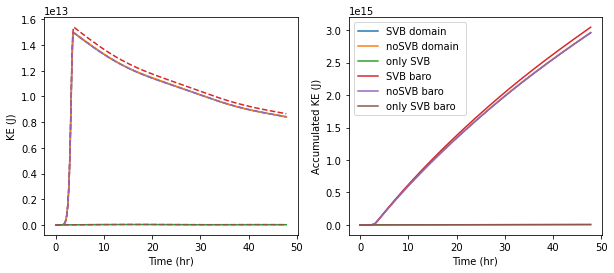

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB, label='SVB domain')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,KE_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='only SVB ')

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB_baro,'--', label='SVB baro')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,KE_noSVB_baro,'--', label='noSVB baro')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro,'--', label='only SVB baro ')

ax1.set_ylabel('KE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(KE_SVB))*600)/3600,np.cumsum(KE_SVB), label='SVB domain ')
ax2.plot((np.arange(len(KE_noSVB))*600)/3600,np.cumsum(KE_noSVB), label='noSVB domain ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_onlySVB), label='only SVB')
ax2.plot((np.arange(len(KE_SVB))*600)/3600,np.cumsum(KE_SVB_baro), label='SVB baro ')
ax2.plot((np.arange(len(KE_noSVB))*600)/3600,np.cumsum(KE_noSVB_baro), label='noSVB baro ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_onlySVB_baro), label='only SVB baro')


ax2.set_ylabel('Accumulated KE (J)')
ax2.set_xlabel('Time (hr)')
#ax2.set_ylim(0,1.75E13)
ax2.legend()

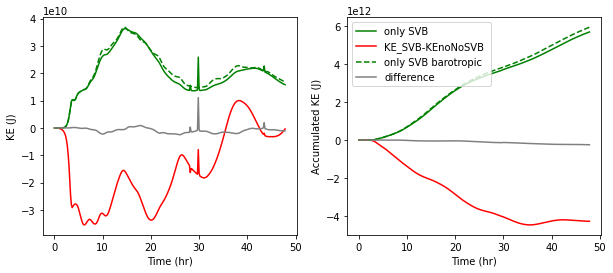

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB,'g-', label='only SVB ')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_SVB-KE_noSVB,'r-', label='KE_SVB-KEnoNoSVB ')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro,'g--', label='only SVB barotropic ')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB-KE_onlySVB_baro,'0.5', label='difference')

ax1.set_ylabel('KE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)


ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_onlySVB), 'g-',label='only SVB')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_SVB-KE_noSVB),'r-', label='KE_SVB-KEnoNoSVB ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_onlySVB_baro), 'g--',label='only SVB barotropic')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,np.cumsum(KE_onlySVB-KE_onlySVB_baro), '0.5',label='difference')
ax2.set_ylabel('Accumulated KE (J)')
ax2.set_xlabel('Time (hr)')
#ax2.set_ylim(0,1.75E13)
ax2.legend()

### All together

#### SVB run - whole domain

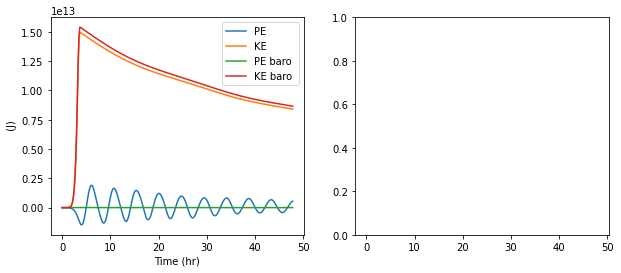

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB), label='PE ')
ax1.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB), label='KE ')
ax1.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro), label='PE baro ')
ax1.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro), label='KE baro')

ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')
ax1.legend()
#ax1.set_xlim(0,5)
#ax1.set_ylim(0,8E9)


Text(0.5, 0, 'Time (hr)')

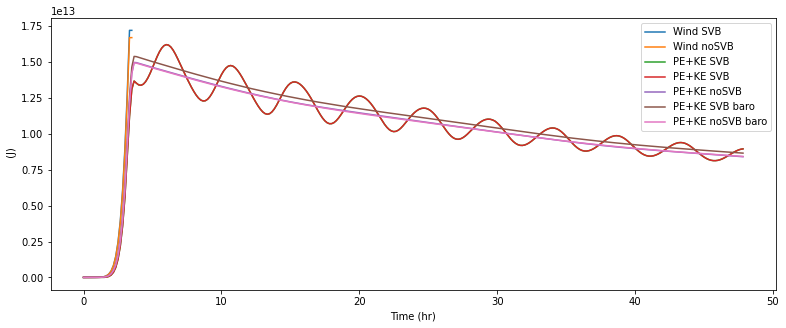

In [14]:
fig, (ax1) = plt.subplots(1,1, figsize=(13,5), sharex=True)
ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), label='Wind SVB')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), label='Wind noSVB')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB+KE_SVB), label='PE+KE SVB ')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB+KE_SVB), label='PE+KE SVB ')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB+EP_noSVB), label='PE+KE noSVB')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB_baro+KE_SVB_baro), label='PE+KE SVB baro ')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB_baro+EP_noSVB_baro), label='PE+KE noSVB baro')
ax1.legend()
ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,5)
#ax1.set_ylim(0,8E9)

Text(0.5, 0, 'Time (hr)')

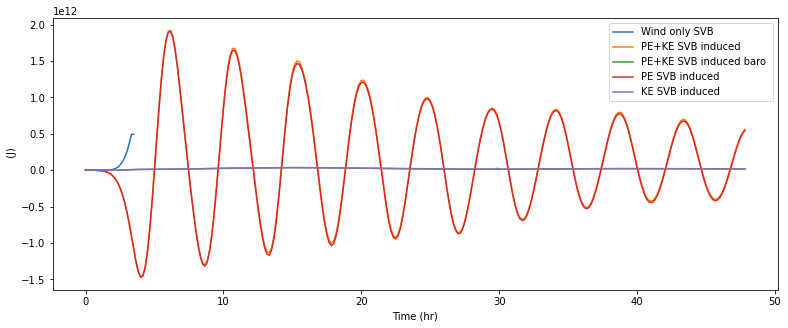

In [15]:
fig, (ax1) = plt.subplots(1,1, figsize=(13,5), sharex=True)
ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), label='Wind only SVB')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_onlySVB+KE_onlySVB), label='PE+KE SVB induced ')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_onlySVB_baro+KE_onlySVB_baro), label='PE+KE SVB induced baro ')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_onlySVB), label='PE SVB induced ')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(KE_onlySVB), label='KE SVB induced ')
ax1.legend()
ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,5)
#ax1.set_ylim(0,8E9)

Text(0.5, 0, 'Time (hr)')

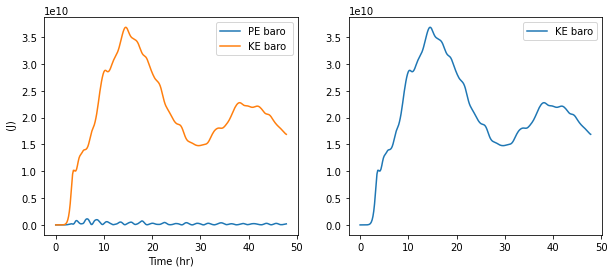

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

#ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB), label='PE ')
#ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB), label='KE ')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro), label='PE baro ')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro), label='KE baro')
ax1.legend()
ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')

#ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB-EP_onlySVB_baro), label='PE ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro), label='KE baro')
#ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB), label='KE  ')
#ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB-KE_onlySVB_baro), label='KE-KE baro ')
ax1.legend()
ax2.legend()
ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')


#ax1.set_xlim(0,5)
#ax1.set_ylim(0,8E9)

(1000000000000.0, 50000000000000.0)

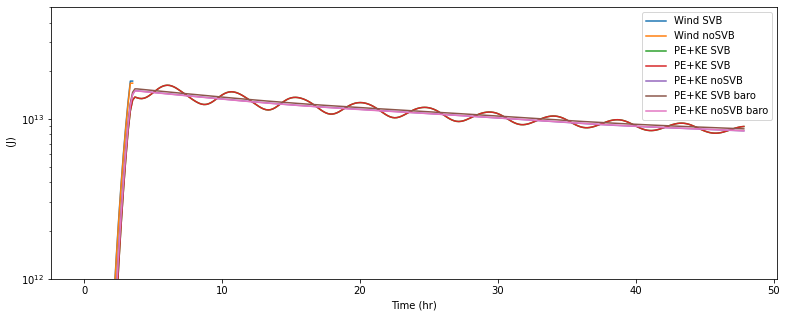

In [30]:
fig, (ax1) = plt.subplots(1,1, figsize=(13,5), sharex=True)
ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), label='Wind SVB')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), label='Wind noSVB')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB+KE_SVB), label='PE+KE SVB ')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB+KE_SVB), label='PE+KE SVB ')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB+EP_noSVB), label='PE+KE noSVB')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB_baro+KE_SVB_baro), label='PE+KE SVB baro ')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB_baro+EP_noSVB_baro), label='PE+KE noSVB baro')
ax1.legend()
ax1.set_ylabel(' (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_yscale('log')
#ax1.set_xlim(0,5)
ax1.set_ylim(1E12,5E13)